In [1]:
from MLTSA_Lite.MLTSA_sk import (
    MLTSA as MLTSA_skl,
    MLTSA_Plot as MLTSA_plot_sk,
)
from MLTSA_Lite.OneD_pot_data import (
    potentials,
    dataset
)
from MLTSA_Lite.models import SKL_Train
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from LRP import *

Running Simulations:   0%|          | 0/100 [00:00<?, ?it/s]

Generating dataset


Running Simulations:   0%|          | 0/100 [00:00<?, ?it/s]

Getting simulation labels for the generated data
Generating dataset


Classifying Simulation Outcomes: 100%|##########| 100/100 [00:00<00:00, 653318.38it/s]


Getting simulation labels for the generated data
Features combined with the relevant DW are: [8, 44, 81, 173, 7, 13, 26, 28, 74, 101, 103, 117, 124]
Feature 8 - Potentials involved: [7, 8]
Pot1: 88.23 %
Pot2: 11.77 %
Feature 44 - Potentials involved: [0, 8]
Pot1: 66.93 %
Pot2: 33.07 %
Feature 81 - Potentials involved: [2, 8]
Pot1: 36.6 %
Pot2: 63.4 %
Feature 173 - Potentials involved: [1, 8]
Pot1: 42.97 %
Pot2: 57.03 %
Feature 7 - Potentials involved: [8, 13]
Pot1: 51.68 %
Pot2: 48.32 %
Feature 13 - Potentials involved: [8, 24]
Pot1: 47.86 %
Pot2: 52.14 %
Feature 26 - Potentials involved: [8, 12]
Pot1: 3.71 %
Pot2: 96.29 %
Feature 28 - Potentials involved: [8, 16]
Pot1: 45.84 %
Pot2: 54.16 %
Feature 74 - Potentials involved: [8, 9]
Pot1: 9.14 %
Pot2: 90.86 %
Feature 101 - Potentials involved: [8, 18]
Pot1: 71.59 %
Pot2: 28.41 %
Feature 103 - Potentials involved: [8, 20]
Pot1: 66.18 %
Pot2: 33.82 %
Feature 117 - Potentials involved: [8, 22]
Pot1: 55.84 %
Pot2: 44.16 %
Feature 124 - Pote

Running Simulations:   4%|4         | 1/25 [00:00<00:05,  4.28it/s]

Accuracy on Train is 95.82222222222222
Accuracy on Test set is 95.19999999999999
Trained in  3.8131229877471924 seconds
Number of Coefs (layer):  2
[(180, 100), (100, 1)]
Number of Intercepts (layer):  2
[(100,), (1,)]
Hidden layer activation function :  relu
Output layer activation function :  logistic
Generating dataset


Classifying Simulation Outcomes: 100%|##########| 25/25 [00:00<00:00, 362829.07it/s]
4it [00:00, 36.86it/s]

Getting simulation labels for the generated data
Validation Accuracy is 90.26666666666667


100it [00:02, 39.21it/s]
/Users/zwei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/zwei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:250: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Number of Coefs (layer):  2
[(180, 100), (100, 1)]
Number of Intercepts (layer):  2
[(100,), (1,)]
Hidden layer activation function :  relu
Output layer activation function :  logistic
Training information: 
Loss :  0.24106828625160162
Number of Iterations for Which Estimator Ran :  401


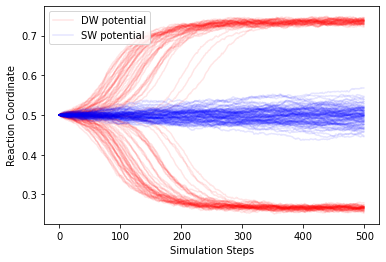

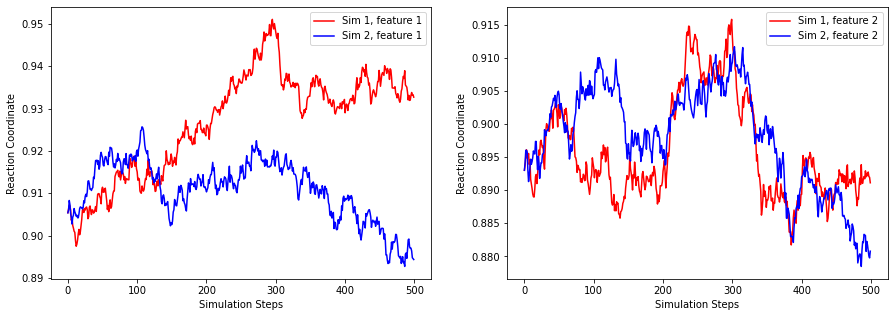

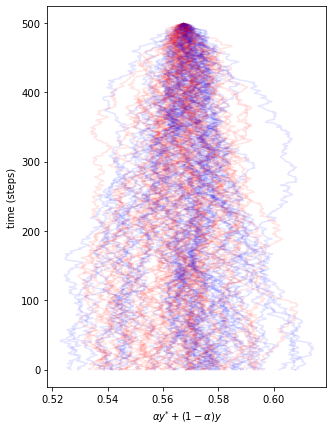

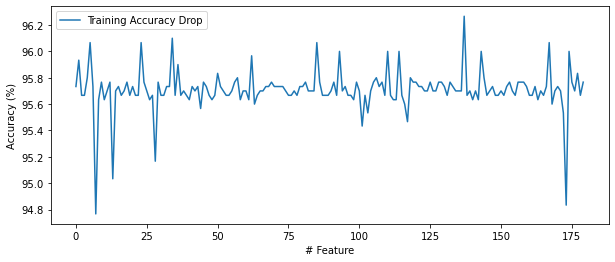

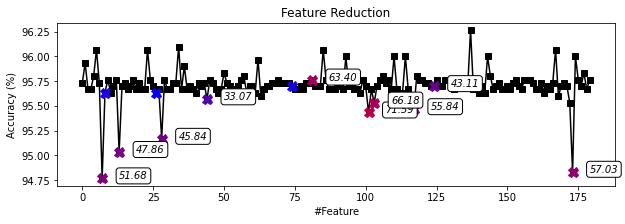

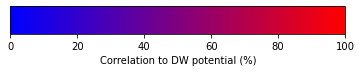

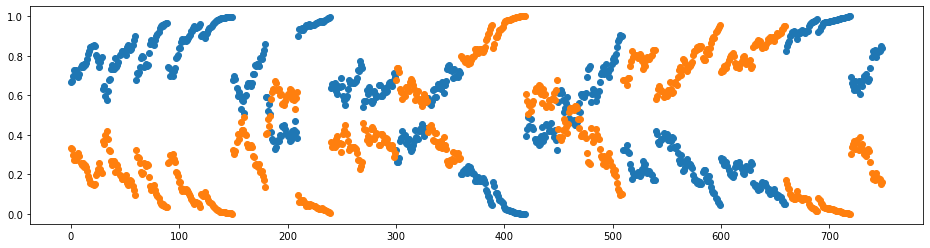

In [2]:
total_n_pots = 25
n_DW = 5
relevant_DW_n = 2
pots = potentials(total_n_pots, n_DW, relevant_DW_n)
n_features = 180
degree_of_mixing = 2

oneD_dataset = dataset(pots, n_features, degree_of_mixing)
n_sims = 100
n_steps = 500
simple_data = pots.generate_data(n_sims, n_steps)
""" We have succesfully created test data for our MLTSA to analyze """
plt.plot(simple_data[0][:,pots.relevant_id,:].T, color="r", label="DW potential", alpha=0.1)
plt.plot(simple_data[0][:,-1,:].T, color="b", label="SW potential", alpha=0.1)
handles, labels = plt.gca().get_legend_handles_labels()
temp = {k:v for k,v in zip(labels, handles)}
plt.legend(temp.values(), temp.keys(), loc='best');
plt.xlabel("Simulation Steps")
plt.ylabel("Reaction Coordinate")
n_simulations = 100
n_steps = 500
data, ans = oneD_dataset.generate_linear(n_simulations, n_steps)
#We proceed to plot the values
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(data[0,0,:], color="r", label="Sim 1, feature 1")
axs[1].plot(data[0,1,:], color="r", label="Sim 1, feature 2")
axs[0].plot(data[1,0,:], color="b", label="Sim 2, feature 1")
axs[1].plot(data[1,1,:], color="b", label="Sim 2, feature 2")
axs[0].legend()
axs[1].legend()
axs[1].set_xlabel("Simulation Steps")
axs[1].set_ylabel("Reaction Coordinate")
axs[0].set_xlabel("Simulation Steps")
axs[0].set_ylabel("Reaction Coordinate")
relevant_dists = np.concatenate((np.where(pots.relevant_id == np.array(oneD_dataset.combinations).T[1])[0],
                          np.where(pots.relevant_id == np.array(oneD_dataset.combinations).T[0])[0]))
print("Features combined with the relevant DW are:", list(relevant_dists))
for feat in relevant_dists:
    print("Feature", feat,"- Potentials involved:",list(oneD_dataset.combinations[feat]))
    summ = np.array(oneD_dataset.mixing_coefs).T[feat][1] + np.array(oneD_dataset.mixing_coefs).T[feat][0]
    print("Pot1:", np.around(100 *np.array(oneD_dataset.mixing_coefs).T[feat][0]/summ, decimals=2), "%")
    print("Pot2:", np.around(100 *np.array(oneD_dataset.mixing_coefs).T[feat][1]/summ, decimals=2), "%")
#We can choose which feature to plot here
feature_to_plot = 80
plt.figure(figsize=(5,7))
for dat, answer in zip(data[:,feature_to_plot,:], ans):
    if answer == "IN":
        plt.plot(list(reversed(dat)), np.arange(0, len(dat)), color="blue", alpha=0.1)
    elif answer == "OUT":
        plt.plot(list(reversed(dat)), np.arange(0, len(dat)), color="r", alpha=0.1)
plt.ylabel("time (steps)")
plt.xlabel(r'$\alpha y^{*} + (1-\alpha)y$')
time_frame = [30, 60]

X, Y = oneD_dataset.PrepareData(data, ans, time_frame, mode="Normal")

print("Shape of X is:", X.shape)
print("Shape of Y is:", Y.shape)
print("X and Y have the same length:", len(X) == len(Y))
#from MLTSA import mlp_sk as SKL_Train
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(random_state=1, verbose=False, max_iter=500) # You can set the verbose to false for less prints.

trained_NN, train_acc, test_acc = SKL_Train(NN, X, Y)
model_summary(NN)
""" Time for Validation with new simulations """

#Generate 25 additional simulations data
data_val, ans_val = oneD_dataset.generate_linear(25, 500)

#Prepare for trial
X_val, Y_val = oneD_dataset.PrepareData(data_val, ans_val, time_frame, mode="Normal")

#Predict the new simulations on the already trained NN
Y_pred = trained_NN.predict(X_val)
val_acc = Y_val == Y_pred
val_acc = np.mean(val_acc)

print("Validation Accuracy is", val_acc*100)
pred_raw = NN._forward_pass_fast(X_val)
pred_raw.shape
[coef.shape for coef in NN.coefs_]
NN.n_layers_
#from MLTSA import MLTSA_skl

#We Call the method on the data, labels and trained NN.
ADrop_train_avg = MLTSA_skl(data[:,:,time_frame[0]:time_frame[1]], ans, trained_NN, drop_mode="Average")

plt.figure(figsize=(10,4))
plt.plot(ADrop_train_avg*100, label="Training Accuracy Drop", color="C0")
plt.legend()
plt.xlabel("# Feature")
plt.ylabel("Accuracy (%)")
plt.ylim()
#from MLTSA import MLTSA_plot_sk

#We simply get the plot with this
MLTSA_plot_sk([ADrop_train_avg], oneD_dataset, pots, errorbar=False)
Y_pred_proba = trained_NN.predict_proba(X_val)
plt.figure(figsize=(16,4))
plt.plot(Y_pred_proba.T[0][:750], marker="o", lw=0)
plt.plot(Y_pred_proba.T[1][:750], marker="o", lw=0)
model_summary(trained_NN, True)

  0%|          | 0/100 [00:00<?, ?it/s]

Append hidden
Appedn output


100%|██████████| 180/180 [00:04<00:00, 37.00it/s]
/Users/zwei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/zwei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:250: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/zwei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/zwei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:250: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


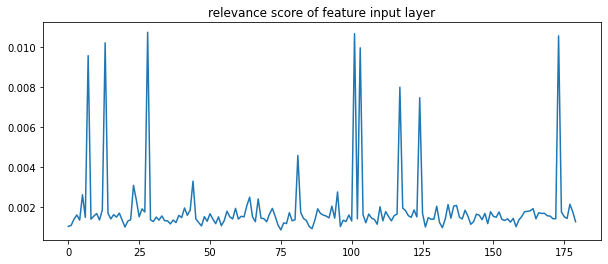

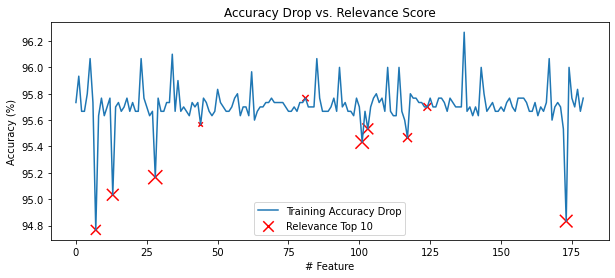

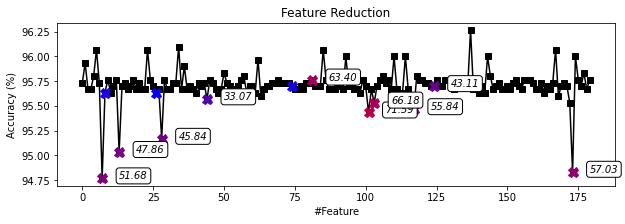

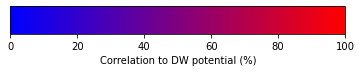

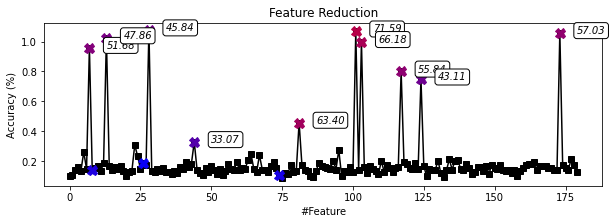

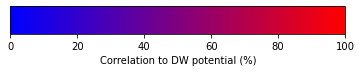

In [3]:
# -- Data Processing -- #
# Calculate Relevance
relevance = LRP_eps_nb(trained_NN, X_val[1]) # X_val[0] could be changed to other inputs
# Number of top relevance score
num = 10
top_num_LRP = np.argsort(relevance[0])[-num:]

# -- Plottings -- #
# Plot of relevance score
plt.figure(figsize=(10,4))
plt.title("relevance score of feature input layer")
plt.plot(relevance[0])
# Plot of Accuracy Drop vs. Relevance Score
plt.figure(figsize=(10,4))
plt.plot(ADrop_train_avg*100, label="Training Accuracy Drop", color="C0")
plt.scatter(top_num_LRP, (ADrop_train_avg*100)[top_num_LRP], marker="x", color='r', label="Relevance Top {}".format(num), s=list(range(20,220,20)))
plt.legend()
plt.title("Accuracy Drop vs. Relevance Score")
plt.xlabel("# Feature")
plt.ylabel("Accuracy (%)")
# Plot of MLTSA accuracy drop vs. feature importance
MLTSA_plot_sk([ADrop_train_avg], oneD_dataset, pots, errorbar=False)
# Plot of Relevance Score vs. feature importance using API of MLTSA plot (title is not accurate)
MLTSA_plot_sk([relevance[0]], oneD_dataset, pots, errorbar=False)

(0.0008418686428026751, 0.020764022117293453)

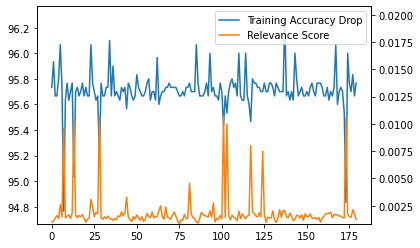

In [4]:
from matplotlib import rc
rc('mathtext', default='regular')

fig = plt.figure()
ax = fig.add_subplot(111)
ln1 = ax.plot(range(len(ADrop_train_avg)), ADrop_train_avg*100, label="Training Accuracy Drop", color="C0")

ax2 = ax.twinx()
ln2 = ax2.plot(range(len(ADrop_train_avg)), relevance[0], label="Relevance Score", color="C1")

#ax.legend(loc='best')
#ax2.legend(loc='best')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=1)

ax.set_ylim(min(ADrop_train_avg*100)-0.1,max(ADrop_train_avg*100)+0.1)
ax2.set_ylim(min(relevance[0]), max(relevance[0])+0.01)

(0.0008418686428026751, 0.020764022117293453)

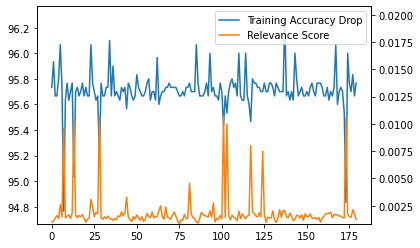

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ln1 = ax.plot(range(len(ADrop_train_avg)), ADrop_train_avg*100, label="Training Accuracy Drop", color="C0")

ax2 = ax.twinx()
ln2 = ax2.plot(range(len(ADrop_train_avg)), relevance[0], label="Relevance Score", color="C1")

#ax.legend(loc='best')
#ax2.legend(loc='best')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=1)

ax.set_ylim(min(ADrop_train_avg*100)-0.1,max(ADrop_train_avg*100)+0.1)
ax2.set_ylim(min(relevance[0]), max(relevance[0])+0.01)

/Users/zwei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/zwei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:250: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


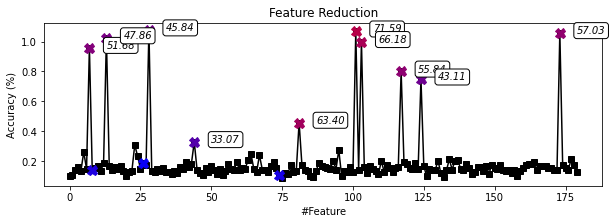

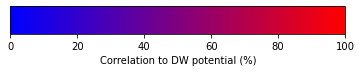

In [6]:
MLTSA_plot_sk([relevance[0]], oneD_dataset, pots, errorbar=False)

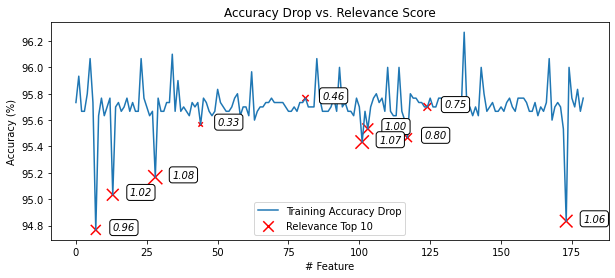

In [7]:
# Plot of Accuracy Drop vs. Relevance Score
plt.figure(figsize=(10,4))
plt.plot(ADrop_train_avg*100, label="Training Accuracy Drop", color="C0")
plt.scatter(top_num_LRP, (ADrop_train_avg*100)[top_num_LRP], marker="x", color='r', label="Relevance Top {}".format(num), s=list(range(20,220,20)))
plt.legend()
plt.title("Accuracy Drop vs. Relevance Score")
plt.xlabel("# Feature")
plt.ylabel("Accuracy (%)")
for index in top_num_LRP:
    plt.text(index + 6, (ADrop_train_avg*100)[index] - 0.005, "{:.2f}".format(relevance[0][index]*100),
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),
                fontstyle="italic", fontweight="medium"
                )

In [8]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range


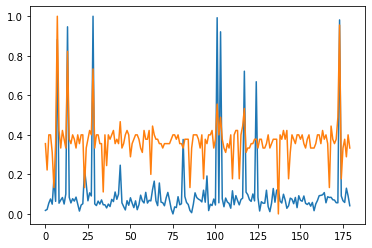

In [9]:
rel_norm = normalization(relevance[0])
ADrop_train_avg_norm = normalization(ADrop_train_avg)

plt.plot(rel_norm)
plt.plot(1-ADrop_train_avg_norm)

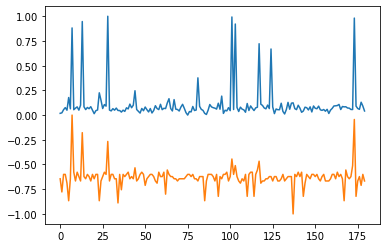

In [10]:
rel_norm = normalization(relevance[0])
ADrop_train_avg_norm = normalization(ADrop_train_avg)

plt.plot(rel_norm)
plt.plot(-ADrop_train_avg_norm)

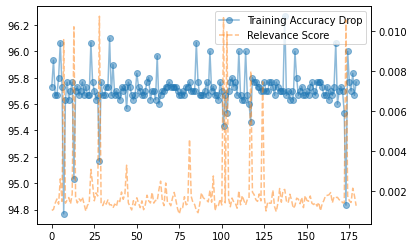

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ln1 = ax.plot(range(len(ADrop_train_avg)), ADrop_train_avg*100,"-o", label="Training Accuracy Drop", color="C0", alpha=0.5)

ax2 = ax.twinx()
ln2 = ax2.plot(range(len(ADrop_train_avg)), relevance[0],"--", label="Relevance Score", color="C1", alpha=0.5)

#ax.legend(loc='best')
#ax2.legend(loc='best')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=1)

In [12]:
top_rel = np.argsort(relevance[0])[-15:]


In [13]:
top_ad = np.argsort(ADrop_train_avg)[:15]

In [14]:
def MLCorrPlot(FR, dataset_og, pots, scoreA, scoreB, topN=10, isDrop=True, fullRank=True):
    """CorrPlot showing the correlation between two scoring method to one dataframe

    :param scoreA: dataA input as score of some criteria
    :type scoreA: numpy.array
    :param scoreB: dataB input as score of some criteria, could be drop(see isDrop)
    :type scoreB: numpy.ndarray
    :param topN: Number of top items of each input data to be count in the plot, defaults to 10
    :type topN: int, optional
    :param isDrop: indeicating the scoreB a score of drop of not, defaults to True, \
        if it is drop then the data would be processed by 1-socreB
    :type isDrop: bool, optional
    :param fullRank: show the full range of each group's top items or not, defaults to True
    :type fullRank: bool, optional
    :return: None
    :rtype: None
    """    
    import matplotlib.pyplot as plt
    import numpy as np
    num = topN
    # Data preprocessing
    #- Validation -#
    assert len(scoreA) == len(scoreB),\
         "Data input should have same dimension"
    #- Normalization -#
    def normalization(data):
        _range = np.max(data) - np.min(data)
        return (data - np.min(data)) / _range
    
    x = np.arange(len(scoreA))
    y = normalization(scoreA)
    z = normalization(scoreB)
    
    # Adding a fixed dimension which length is same as above inputs
    fix_value = []
    # Calculate data y and data z's maximum, take 1/4 of it as the fixed width of bar
    value_max = max(max(y), max(z))
    fix_temp = value_max / 4
    for i in range(len(x)):
        fix_value.append(fix_temp)
    # Trun z into negativa value (here if z is adrop, would calculate it by subtracting from 1)
    if isDrop:
        z_ne = [zs - 1 for zs in z]
    else:
        z_ne = [-zs for zs in z]

    # Set text front size to be 12
    plt.rcParams['font.size'] = 12
    # Set figsize to make layout better
    plt.figure(figsize=(15, 8))
    # Draw the bars, set the color and bar width, plot fix_value, y, and z_ne into the frame
    plt.bar(x, fix_value, color='w', width=0.5)
    plt.bar(x, y, bottom=fix_value, color='#037171', label='RelevanceScore(%)', width=0.5)
    plt.bar(x, z_ne, color='#FF474A', width=0.5, label='AccuracyDrop(%)')
    
    # Adding data label, plot the x axis of common top items for both group

    # Process the data to find common tops
    top_y = np.argsort(y)[-num:] # Top 15 Relevance Score, reverse to find the tops
    top_z = np.argsort(z)[:num] # Top 15 Accuracy Drop, negative since measuring the drop
    # Find the common terms
    top_com = []
    for index in top_y:
        if index in top_z:
            top_com.append(index)
    
    # Plot those tops
    for a, b in zip(top_com, fix_value):
        plt.text(a, b/2, '%s' % str(a), ha='center', va='center', fontsize=12)
    for a, b in zip(top_com, top_com):
        plt.text(a, y[b] + fix_temp + value_max / 20, "{:.2f}".format(scoreA[b]*100), ha='center', va='center')
    for a, b in zip(top_com, top_com):
        plt.text(a, z_ne[b] - value_max / 20, "{:.2f}".format((scoreB*100)[b]), ha='center', va='center')
    if fullRank:
        for index in top_y:
            if index not in top_com:
                plt.text(index, y[index] + fix_temp + value_max / 20, "{:.2f}".format(scoreA[index]*100),\
                        ha='center', va='center', color='grey')
        for index in top_z:
            if index not in top_com:
                plt.text(index, (z-1)[index] - value_max / 20, "{:.2f}".format((scoreB*100)[index]),\
                        ha='center', va='center', color='grey')

    # Hide the y_ticks of plot (Since the data is normalized and reversed)
    plt.yticks([])
    # Add legend, set the position manually
    plt.legend(bbox_to_anchor=(-0.02, 0.5), frameon=False)
    # Add title and bold the title
    plt.title(label='RelevanceScore vs. AccuracyDrop', fontsize=14, fontweight='bold')
    # Set the frame of plotting area invisible
    ax = plt.gca()
    ax.set_axisbelow(True)
    [ax.spines[loc_axis].set_visible(False) for loc_axis in ['bottom', 'top', 'right', 'left']]
    # Correlation plotting test
    #-----#
    from matplotlib.colors import LinearSegmentedColormap
    import matplotlib as mpl
    # Fetching info
    std = np.std(FR, axis=0, ddof=1) * 100
    dat = np.mean(FR, axis=0) * 100
    coefs = dataset_og.mixing_coefs
    coefs = np.array(coefs).T
    combs = dataset_og.combinations
    imp_id = pots.relevant_id

    # Getting the correlated features
    cor_feats = []
    for n, idx in enumerate(combs[:len(dat)]):
        if imp_id in idx:
            cor_feats.append(n)

    # Calculating Correlation relation
    correlations = []
    for n, f in enumerate(cor_feats):
        correlation = coefs[f][np.where(np.array(combs[f]) == imp_id)[0][0]] / np.sum(coefs[f]) * 100
        correlations.append(correlation)

    # Plot
    for correlated_feat, corr in zip(cor_feats, correlations):
        # rgb = colorsys.hsv_to_rgb((200+int(corr))/300., 1.0, 1.0)
        rgb = ((corr * 2.55) / 255, 0, 1 - (corr * 2.55) / 255)
        plt.plot(correlated_feat, z_ne[correlated_feat], "X", markersize=10, color=rgb)
        if corr > 30:
            plt.text(correlated_feat + 6, z_ne[correlated_feat] - 0.005, "{:.2f}".format(corr),
                        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),
                        fontstyle="italic", fontweight="medium"
                        )

    rgb1 = (0, 0, 1)
    rgb2 = (1, 0, 0)
    cmap_name = "corr"
    cmap = LinearSegmentedColormap.from_list(cmap_name, [rgb1, rgb2], N=100)
    fig, ax = plt.subplots(figsize=(15, 1))
    fig.subplots_adjust(bottom=0.5)
    norm = mpl.colors.Normalize(vmin=0, vmax=100)
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                        cax=ax, orientation='horizontal', label='Correlation to DW potential (%)')
    #-----#
    # Show the plot
    plt.show()



/Users/zwei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/zwei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:250: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


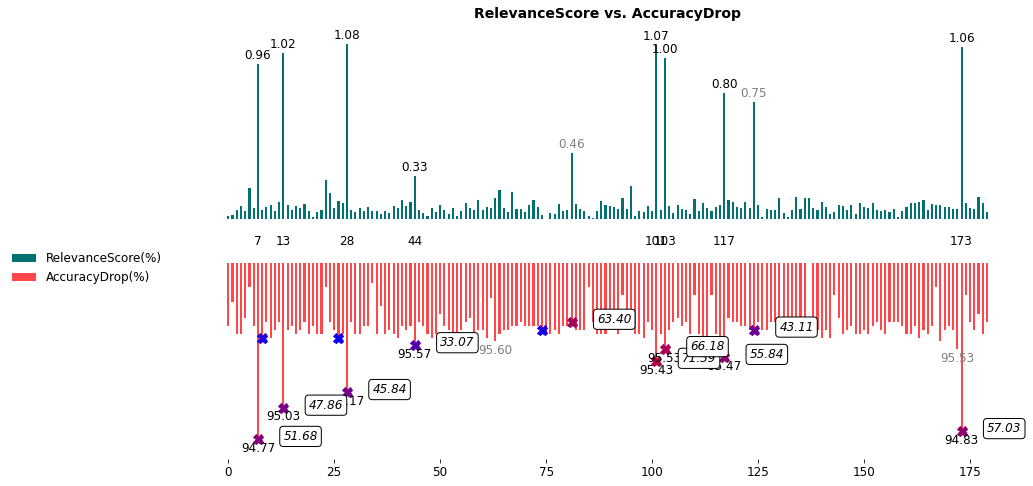

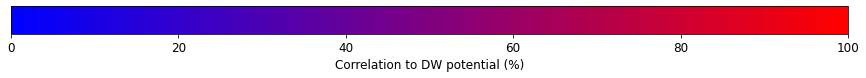

In [15]:
MLCorrPlot([ADrop_train_avg], oneD_dataset, pots, scoreA=relevance[0], scoreB=ADrop_train_avg, topN=10, isDrop=True, fullRank=True)